In [1]:
%matplotlib inline

# Extract image features

This example shows the computation of spot-wise features from Visium
images.

Visium datasets contain high-resolution images of the tissue in addition
to the spatial gene expression measurements per spot (*obs*). In this
notebook, we extract features for each spot from an image using
`squidpy.im.calculate_image_features` and create a **obs x features**
matrix that can be analyzed together with the **obs x genes** spatial
gene expression matrix.

::: seealso
We provide different feature extractors that are described in more
detail in the following examples:

-   See `sphx_glr_auto_examples_image_compute_summary_features.py` on
    how to calculate summary statistics of each color channel.
-   See `sphx_glr_auto_examples_image_compute_texture_features.py` on
    how to calculate texture features based on repeating patterns.
-   See `sphx_glr_auto_examples_image_compute_histogram_features.py` on
    how to calculate color histogram features.
-   See `sphx_glr_auto_examples_image_compute_segmentation_features.py`
    on how to calculate number and size of objects from a binary
    segmentation layer.
-   See `sphx_glr_auto_examples_image_compute_custom_features.py` on how
    to calculate custom features by providing any feature extraction
    function.
:::


In [2]:
import squidpy as sq

import numpy as np

import seaborn as sns

# get spatial dataset including high-resolution tissue image
img = sq.datasets.visium_hne_image_crop()
adata = sq.datasets.visium_hne_adata_crop()

In [3]:
img

ImageContainer[shape=(3527, 3527), layers=['image']]

In [4]:
adata

AnnData object with n_obs × n_vars = 684 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

The high-resolution tissue image is contained in `img['image']`, and the
spot locations coordinates are stored in `adata.obsm['spatial']`. We can
plot the spots overlayed on a lower-resolution version of the tissue
image contained in `adata`.


ImageContainer[shape=(3527, 3527), layers=['image']]
[[1575   98]
 [2538 1774]
 [1850   98]
 ...
 [2263 1534]
 [2401 1055]
 [2676 1774]]


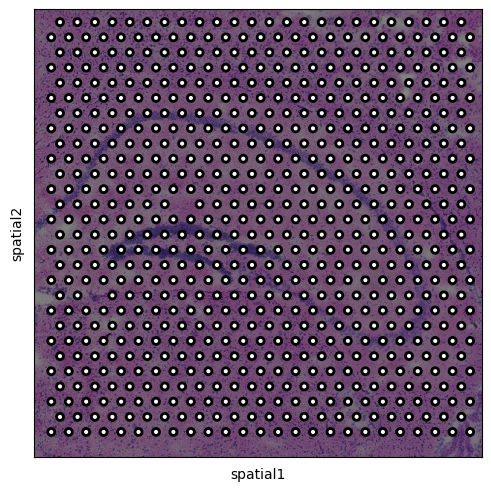

In [5]:
np.set_printoptions(threshold=10) # sets the image resolution by summarizing pixels under a threshold
                                  # Supposedly, I didn't see any difference with threshold variations
print(img)
print(adata.obsm["spatial"])

sq.pl.spatial_scatter(adata, outline=True, size=0.3)

Using this information, we can now extract features from the tissue
underneath each spot by calling `squidpy.im.calculate_image_features`.
This function takes both `adata` and `img` as input, and will write the
resulting `obs x features` matrix to `adata.obsm[<key>]`. It contains
several arguments to modify its behavior. With these arguments you can:

> -   specify the image used for feature calculation using `layer`.
> -   specify the type of features that should be calculated using
>     `features` and `features_kwargs`.
> -   specify how the crops used for feature calculation look like using
>     `kwargs`.
> -   specify parallelization options using `n_jobs`, `backend`, and
>     `show_progress_bar`.
> -   specify how the data is returned using `key_added` and `copy`.

Let us first calculate summary features and save the result in
`adata.obsm['features']`.


In [6]:
sq.im.calculate_image_features(adata, img, features="summary", key_added="features", show_progress_bar=False)
adata

AnnData object with n_obs × n_vars = 684 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'features'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

ImageContainer[shape=(3527, 3527), layers=['image']]
[[1575   98]
 [2538 1774]
 [1850   98]
 ...
 [2263 1534]
 [2401 1055]
 [2676 1774]]


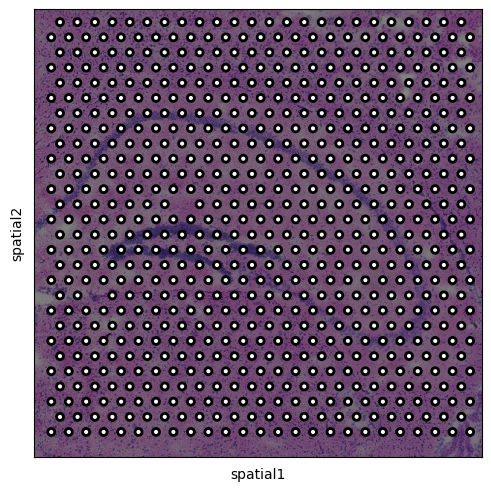

In [7]:
np.set_printoptions(threshold=1000) # sets the image resolution by summarizing pixels under a threshold
print(img)
print(adata.obsm["spatial"])

sq.pl.spatial_scatter(adata, outline=True, size=0.3)

In [8]:
# show the calculated features
adata.obsm["features"].head()

,summary_ch-0_quantile-0.9,summary_ch-0_quantile-0.5,summary_ch-0_quantile-0.1,summary_ch-0_mean,summary_ch-0_std,summary_ch-1_quantile-0.9,summary_ch-1_quantile-0.5,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std,summary_ch-2_quantile-0.9,summary_ch-2_quantile-0.5,summary_ch-2_quantile-0.1,summary_ch-2_mean,summary_ch-2_std
AAAGACCCAAGTCGCG-1,140.0,112.0,78.0,110.332029,24.126489,108.0,80.0,53.0,80.129908,21.863844,140.0,115.0,90.0,115.145057,19.554108
AAAGGGATGTAGCAAG-1,144.0,114.0,90.0,115.557253,21.279808,107.0,77.0,56.0,79.957329,20.546552,142.0,111.0,88.0,113.362959,21.422890
AAAGTCACTGATGTAA-1,139.0,115.0,84.0,112.740563,22.550223,121.0,94.0,66.0,93.735134,22.459672,141.0,118.0,93.0,117.298447,19.089482
AAATGGCATGTCTTGT-1,138.0,109.0,74.0,107.372175,24.896688,101.0,71.0,45.0,72.320288,21.589912,142.0,111.0,85.0,112.642091,21.896309
AAATGGTCAATGTGCC-1,146.0,113.0,84.0,113.296553,24.740431,112.0,77.0,53.0,80.073602,22.858352,144.0,113.0,89.0,115.193915,20.901613


To visualize the features, we can use `squidpy.pl.extract` to plot the
texture features on the tissue image.

Here, we plot the median values of all channels
([summary_ch-0_quantile-0.5]{.title-ref},
[summary_ch-0_quantile-0.5]{.title-ref}, and
[summary_ch-2_quantile-0.5]{.title-ref}).


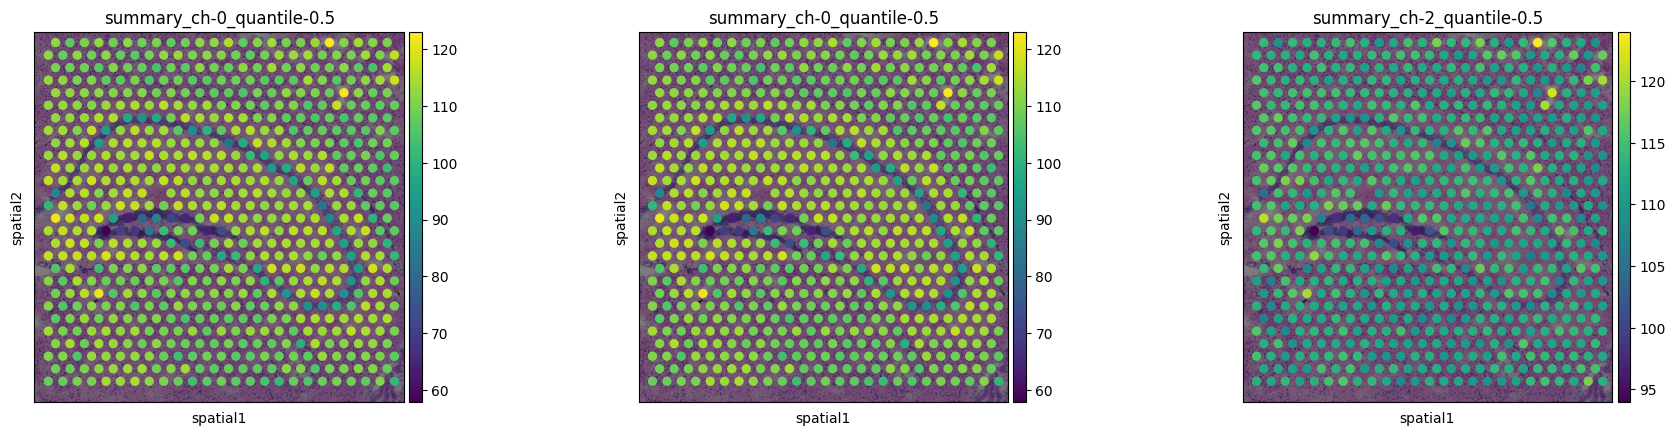

In [9]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "features"),
    color=["summary_ch-0_quantile-0.5", "summary_ch-0_quantile-0.5", "summary_ch-2_quantile-0.5"],
)

# Specify crop appearance

Features are extracted from image crops that capture the Visium spots
(see also `sphx_glr_auto_examples_image_compute_crops.py`). By default,
the crops have the same size as the spot, are not scaled and square. We
can use the `mask_circle` argument to mask a circle and ensure that only
tissue underneath the round Visium spots is taken into account to
compute the features. Further, we can set `scale` and `spot_scale`
arguments to change how the crops are generated. For more details on the
crop computation, see also
`sphx_glr_auto_examples_image_compute_crops.py`.

> -   Use `mask_circle = True, scale = 1, spot_scale = 1`, if you would
>     like to get features that are calculated only from tissue in a
>     Visium spot.
> -   Use `scale = X`, with [X \< 1]{.title-ref}, if you would like to
>     downscale the crop before extracting the features.
> -   Use `spot_scale = X`, with [X \> 1]{.title-ref}, if you want to
>     extract crops that are X-times the size of the Visium spot.

Let us extract masked and scaled features and compare them.

We subset `adata` to the first 50 spots to make the computation of
features fast. Skip this step if you want to calculate features from all
spots.


In [10]:
adata_sml = adata[:50].copy()

# calculate default features
sq.im.calculate_image_features(
    adata_sml, img, features=["summary", "texture", "histogram"], key_added="features", show_progress_bar=False
)
# calculate features with masking
sq.im.calculate_image_features(
    adata_sml,
    img,
    features=["summary", "texture", "histogram"],
    key_added="features_masked",
    mask_circle=True,
    show_progress_bar=False,
)
# calculate features with scaling and larger context
sq.im.calculate_image_features(
    adata_sml,
    img,
    features=["summary", "texture", "histogram"],
    key_added="features_scaled",
    mask_circle=True,
    spot_scale=2,
    scale=0.5,
    show_progress_bar=False,
)

adata_sml.obsm

AxisArrays with keys: X_pca, X_umap, spatial, features, features_masked, features_scaled

In [11]:
adata_sml.obsm['features_masked']

,histogram_ch-0_bin-0,histogram_ch-0_bin-1,histogram_ch-0_bin-2,histogram_ch-0_bin-3,histogram_ch-0_bin-4,histogram_ch-0_bin-5,histogram_ch-0_bin-6,histogram_ch-0_bin-7,histogram_ch-0_bin-8,histogram_ch-0_bin-9,...,texture_ch-2_homogeneity_dist-1_angle-1.57,texture_ch-2_homogeneity_dist-1_angle-2.36,texture_ch-2_correlation_dist-1_angle-0.00,texture_ch-2_correlation_dist-1_angle-0.79,texture_ch-2_correlation_dist-1_angle-1.57,texture_ch-2_correlation_dist-1_angle-2.36,texture_ch-2_ASM_dist-1_angle-0.00,texture_ch-2_ASM_dist-1_angle-0.79,texture_ch-2_ASM_dist-1_angle-1.57,texture_ch-2_ASM_dist-1_angle-2.36
AAAGACCCAAGTCGCG-1,1844,7,189,391,761,1657,1888,929,217,38,...,0.295455,0.262696,0.925552,0.879801,0.918419,0.878572,0.045693,0.040139,0.045666,0.040138
AAAGGGATGTAGCAAG-1,1844,0,12,325,1563,2378,1257,435,98,9,...,0.280333,0.258243,0.910340,0.851886,0.912764,0.866188,0.045640,0.040100,0.045634,0.040115
AAAGTCACTGATGTAA-1,1844,19,89,169,591,1698,2342,941,192,36,...,0.300462,0.265588,0.925663,0.883232,0.921034,0.878833,0.045723,0.040185,0.045728,0.040172
AAATGGCATGTCTTGT-1,1844,18,178,486,1148,2006,1565,571,104,1,...,0.283079,0.253241,0.913518,0.862973,0.912854,0.866541,0.045628,0.040101,0.045629,0.040097
AAATGGTCAATGTGCC-1,1844,7,130,358,1188,2003,1446,714,199,32,...,0.291089,0.258272,0.920426,0.881203,0.919713,0.871901,0.045666,0.040136,0.045679,0.040125
AAATTAACGGGTAGCT-1,1850,78,233,580,1424,1847,1241,515,133,20,...,0.289184,0.256444,0.920727,0.880298,0.919638,0.867021,0.045617,0.040099,0.045627,0.040084
AACAACTGGTAGTTGC-1,1879,250,178,306,658,1497,1704,988,392,69,...,0.291239,0.261260,0.930542,0.887176,0.924613,0.887514,0.045655,0.040101,0.045615,0.040102
AACAGGAAATCGAATA-1,1844,26,146,327,784,1579,2419,664,118,14,...,0.305591,0.269685,0.920543,0.879636,0.925637,0.880682,0.045704,0.040167,0.045721,0.040178
AACAGGATGGGCCGCG-1,1844,14,18,149,371,1294,2461,1422,328,20,...,0.314096,0.273688,0.934473,0.905324,0.929885,0.888854,0.045836,0.040324,0.045805,0.040220
AACCATGGGATCGCTA-1,1872,315,255,310,651,1602,1885,852,166,13,...,0.315901,0.279778,0.923067,0.885951,0.927851,0.889308,0.045701,0.040175,0.045706,0.040150


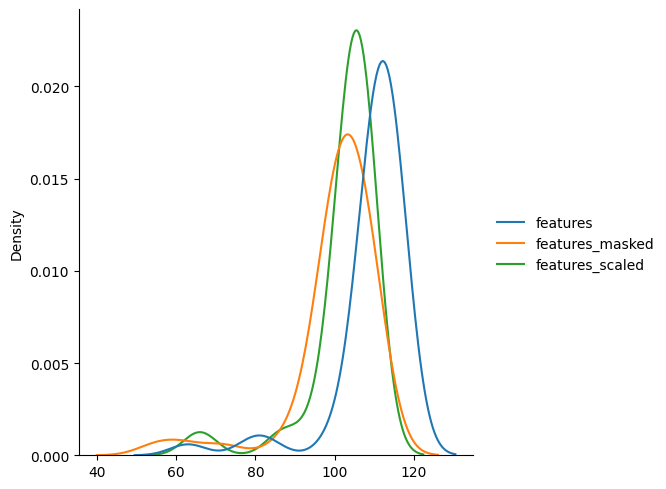

In [12]:
# plot distribution of median for different cropping options
_ = sns.displot(
    {
        "features": adata_sml.obsm["features"]["summary_ch-0_quantile-0.5"],
        "features_masked": adata_sml.obsm["features_masked"]["summary_ch-0_quantile-0.5"],
        "features_scaled": adata_sml.obsm["features_scaled"]["summary_ch-0_quantile-0.5"],
    },
    kind="kde",
)

The masked features have lower median values, because the area outside
the circle is masked with zeros.


# Parallelization

Speeding up the feature extraction is easy. Just set the `n_jobs` flag
to the number of jobs that should be used by
`squidpy.im.calculate_image_features`.


> IDF: lets also do the statistic with all visium spots

In [13]:
sq.im.calculate_image_features(
    adata, 
    img, 
    features="summary", 
    key_added="features_all_masked",
    mask_circle=True,
    n_jobs=4, 
    show_progress_bar=False)

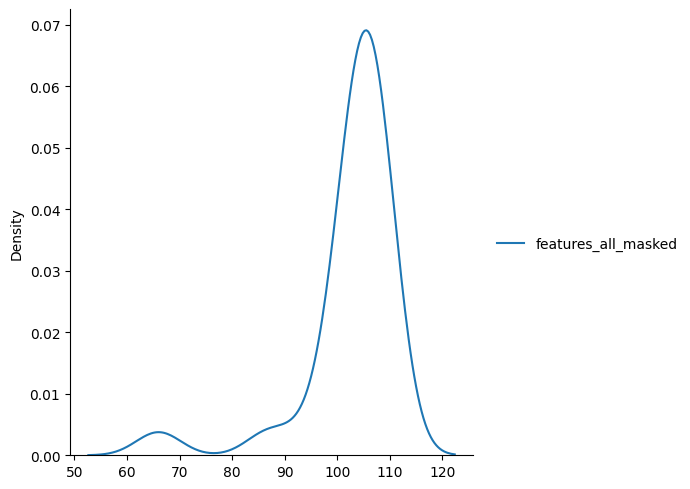

In [14]:
_ = sns.displot(
    {
        "features_all_masked": adata_sml.obsm["features_scaled"]["summary_ch-0_quantile-0.5"],
    },
    kind="kde",
)